In [1]:
# filtro basado en contenido --> segun el comportamiento de la persona
# filtro basado en colaboracion --> ajuste a personas con mismos patrones
# filtro basado en conocimiento --> ajuste a necesidades

# Sistemas de Recomendacion

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset/movies_metadata.csv', low_memory = False)
df.shape

(45466, 24)

In [4]:
df.keys()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [7]:
C = df['vote_average'].mean()

In [8]:
print("La media de vote_average es: ", C)

La media de vote_average es:  5.618207215134185


In [9]:
m = df['vote_count'].quantile(0.90)

In [10]:
print("El cuartil con 0.90 es: ", m)

El cuartil con 0.90 es:  160.0


In [11]:
# votos por encima o iguales al cuartil
q_movies = df.copy().loc[df['vote_count']>=m]

In [12]:
print("La canidad de votos por encima del cuartil de ",m," es de: ",q_movies.shape)

La canidad de votos por encima del cuartil de  160.0  es de:  (4555, 24)


In [13]:
df.keys()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [14]:
# calificacion ponderada por pelicula

def weighted_rating ( x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
q_movies['Score'] = q_movies.apply(weighted_rating, axis=1)

In [16]:
q_movies = q_movies.sort_values('Score', ascending=False)
q_movies[['title','vote_count','vote_average','Score']].head(15)

,title,vote_count,vote_average,Score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


In [17]:
q_movies['overview'].head()

314      Framed in the 1940s for the double murder of h...
834      Spanning the years 1945 to 1955, a chronicle o...
10309    Raj is a rich, carefree, happy-go-lucky second...
12481    Batman raises the stakes in his war on crime. ...
2843     A ticking-time-bomb insomniac and a slippery s...
Name: overview, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words = 'english')
q_movies['overview'] = q_movies['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(q_movies['overview'])
tfidf_matrix.shape                                   

(4555, 19694)

In [20]:
from sklearn.metrics.pairwise import linear_kernel

In [21]:
consine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
consine_sim.shape

(4555, 4555)

In [23]:
consine_sim[1]

array([0.00522362, 1.        , 0.01249039, ..., 0.        , 0.01420965,
       0.01535064])

In [24]:
indices = pd.Series(q_movies.index, index = q_movies['title']).drop_duplicates()

In [25]:
indices[:10]

title
The Shawshank Redemption         314
The Godfather                    834
Dilwale Dulhania Le Jayenge    10309
The Dark Knight                12481
Fight Club                      2843
Pulp Fiction                     292
Schindler's List                 522
Whiplash                       23673
Spirited Away                   5481
Life Is Beautiful               2211
dtype: int64

In [26]:
def recommender(title, consine_sim = consine_sim):
    idx = indices[title]
    sim_scores = list (enumerate(consine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores]
    
    return q_movies['title'].iloc[movies_indices]

In [27]:
recommender('Fight Club')

1030                                             Swingers
5174                                 Three Men and a Baby
22077                                  Charlie Countryman
2834                                      The Blue Lagoon
11561                                              Norbit
21419                                              Planes
25795                                   The Invisible Boy
14141                          The Men Who Stare at Goats
36243    Crouching Tiger, Hidden Dragon: Sword of Destiny
15508                                      A Serbian Film
Name: title, dtype: object

In [28]:
credits = pd.read_csv('dataset/credits/credits.csv')

In [29]:
keywords = pd.read_csv('dataset/keywords.csv')

In [30]:
keywords.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [31]:
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [32]:
df = df.drop([19730, 29503, 35587])

In [33]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
df['id'] = df['id'].astype('int')

In [34]:
df = df.merge(credits, on='id')
df = df.merge(keywords, on='id')

In [35]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [36]:
from ast import literal_eval

features = ['cast','crew','keywords','genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [37]:
import numpy as np

In [38]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [39]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [40]:
df['director'] = df['crew'].apply(get_director)

In [41]:
features = ['cast','keywords','genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [42]:
df[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [43]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [45]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])


In [46]:
df['soup'] = df.apply(create_soup, axis=1)

In [47]:
df[['soup']].head(2)

,soup
0,jealousy toy boy tomhanks timallen donrickles ...
1,boardgame disappearance basedonchildren'sbook ...


In [48]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [50]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

MemoryError: Unable to allocate 16.2 GiB for an array with shape (46628, 46628) and data type float64

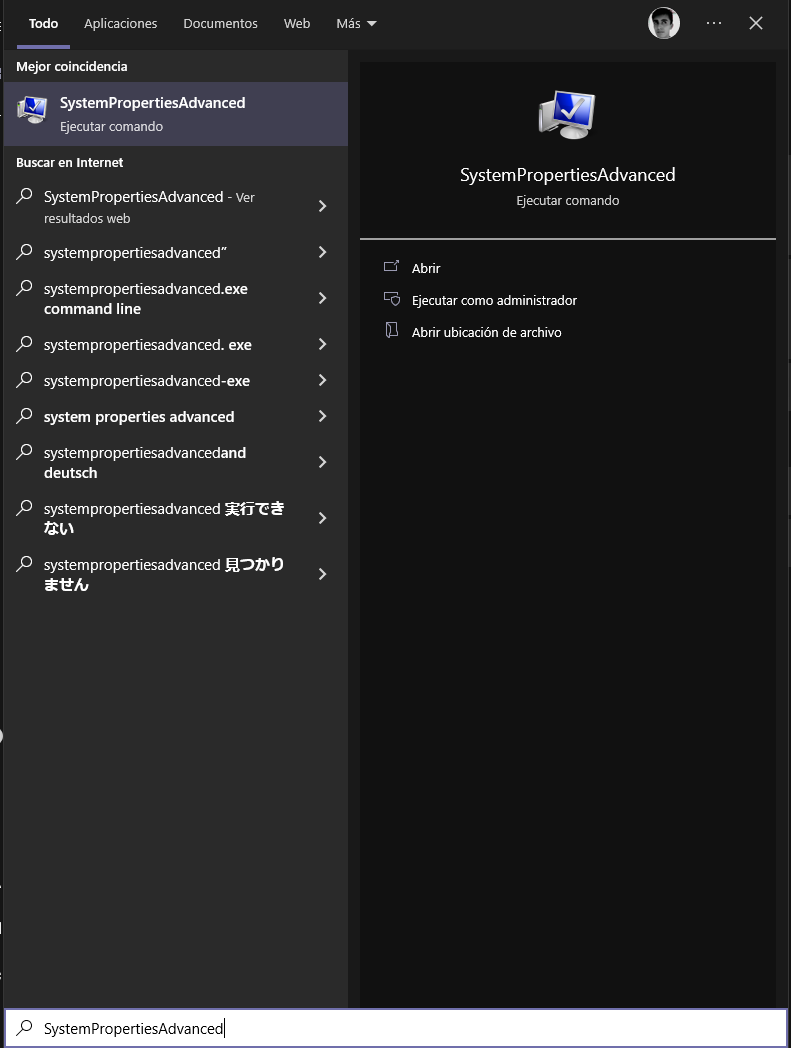

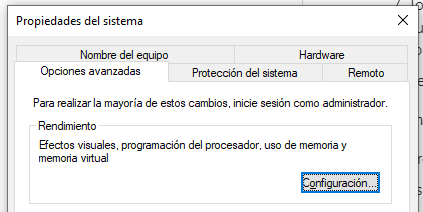

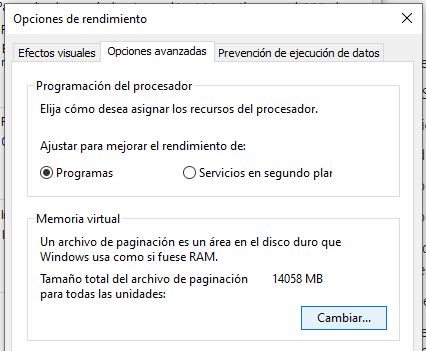

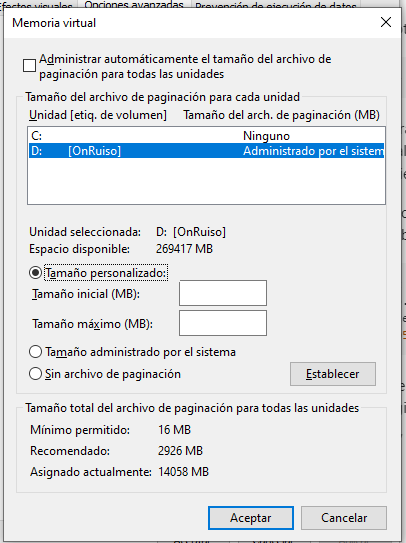

Reference:https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type

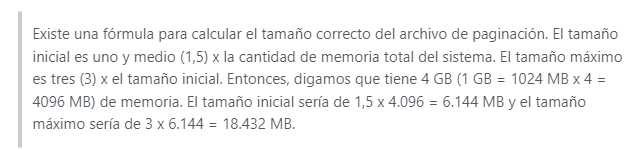



In [ ]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:5]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Jumanji', cosine_sim2)

In [ ]:
df.head(2)